<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

## Quick review of SBM model data at different pacing frequencies for control, +amylin incubated, HIP transgenic
Data taken from https://docs.google.com/spreadsheets/d/1WWbGLlzAKW1pdtvta5J7oTf4Tfn27Ni27zBpe6kl57I/edit#gid=0

In [1]:
import pandas as pd

ImportError: No module named 'pandas'

In [2]:
#df = pd.read_csv("Despa.csv")
df = pd.read_csv("data/Despa.csv")

NameError: name 'pd' is not defined

In [4]:
df

,Case,Hz,SL_Ca_max,SR_Ca_max,SR_Ca_min,RYR_I,RYR_ O,Cleft_Ca_max,Cleft_Ca_min,i_CaL_Max,i_CaL_Min,Unnamed: 11
0,Control,0.1,0.017871,0.71286,0.279400,0.001171,0.000051,0.335960,0.000444,-0.000867,-23.822788,NaN
1,Amy,0.1,0.019253,0.73049,0.284930,0.001211,0.000062,0.336941,0.000553,-0.000888,-0.000856,<--- incorrect
2,HIP,0.1,0.018772,0.72410,0.241790,0.001144,0.000058,0.332327,0.000557,-0.000920,-23.315400,NaN
3,Control,0.5,0.014009,0.66497,0.295188,0.002555,0.000119,0.298991,0.000412,-0.000861,-23.678690,NaN
4,Amy,0.5,0.019178,0.72890,0.285720,0.003581,0.000147,0.340278,0.000563,-0.000856,-23.013236,NaN
5,HIP,0.5,0.018536,0.71950,0.240988,0.003396,0.000141,0.332328,0.000561,-0.000887,-23.255240,NaN
6,Control,1.0,0.011242,0.62633,0.310600,0.003070,0.000162,0.219590,0.000400,-0.000793,-22.851070,NaN
7,Amy,1.0,0.018397,0.71655,0.284040,0.005792,0.000231,0.343405,0.000551,-0.000820,-22.806460,NaN
8,HIP,1.0,0.015436,0.68191,0.253210,0.004540,0.000201,0.310242,0.000534,-0.000860,-22.978920,NaN
9,Control,1.5,0.010370,0.61510,0.319522,0.004256,0.000235,0.201645,0.000537,-0.000793,-22.668150,NaN


In [5]:
bools = df['Case'].isin(['Control'])
print df[bools]
print df.columns

       Case   Hz  SL_Ca_max  SR_Ca_max  SR_Ca_min     RYR_I    RYR_ O  \
0   Control  0.1   0.017871    0.71286   0.279400  0.001171  0.000051   
3   Control  0.5   0.014009    0.66497   0.295188  0.002555  0.000119   
6   Control  1.0   0.011242    0.62633   0.310600  0.003070  0.000162   
9   Control  1.5   0.010370    0.61510   0.319522  0.004256  0.000235   
12  Control  2.0   0.010188    0.61647   0.327800  0.005031  0.000281   

    Cleft_Ca_max  Cleft_Ca_min  i_CaL_Max  i_CaL_Min Unnamed: 11  
0       0.335960      0.000444  -0.000867 -23.822788         NaN  
3       0.298991      0.000412  -0.000861 -23.678690         NaN  
6       0.219590      0.000400  -0.000793 -22.851070         NaN  
9       0.201645      0.000537  -0.000793 -22.668150         NaN  
12      0.193960      0.000420  -0.000748 -22.635800         NaN  
Index([u'Case', u'Hz', u'SL_Ca_max', u'SR_Ca_max', u'SR_Ca_min', u'RYR_I',
       u'RYR_ O', u'Cleft_Ca_max', u'Cleft_Ca_min', u'i_CaL_Max', u'i_CaL_Min',
    

#### SL Ca max 
Brad reported SL Ca max, but probably the more meaningful statistic will be the cleft or SL [Ca] at diastole. Nevertheless, the peak Ca declines with frequency and we have +amy > +hip > ctl. Note that +hip has reduced SERCA function

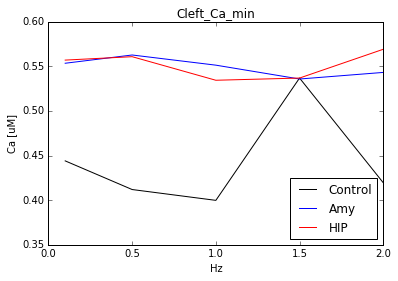

In [11]:
cases = ['Control', 'Amy', 'HIP']
colors = ['k','b','r']
mM_to_uM=1e3
#data = "SL_Ca_max"; col = 2
data = "Cleft_Ca_min"; col = 8

for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    
    sl_ca_max = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    plt.plot(hz,mM_to_uM*sl_ca_max,colors[i],label=case)
plt.legend(loc=0)
plt.title(data)
plt.ylabel("Ca [uM]")
plt.xlabel("Hz")


#### SR Ca handling
SR diastolic/systolic content both decline with increasing pacing, which results in reduced fractional release with pacing. 
The +amy and +hip present the largest SR Ca transients and greater fractional release than control. 

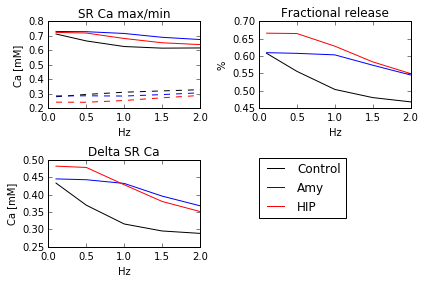

In [12]:
cases = ['Control', 'Amy', 'HIP']
colors = ['k','b','r']


plt.subplot(2,2,1)
data = "SR_Ca_max"; col =3
for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    
    entreys = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    plt.plot(hz,entreys,colors[i],label=case)
plt.legend(bbox_to_anchor=[2,-0.5])

data = "SR_Ca_min"; col =4
for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    
    entreys = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    plt.plot(hz,entreys,colors[i]+'--',label=case)

plt.ylabel("Ca [mM]")
plt.xlabel("Hz")
plt.title("SR Ca max/min")


plt.subplot(2,2,2)
for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    data = "SR_Ca_max"; col =3
    dia = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    data = "SR_Ca_min"; col =4
    sys = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    fracRel = (dia - sys)/dia
    plt.plot(hz,fracRel,colors[i],label=case)

plt.ylabel("%")
plt.xlabel("Hz")
plt.title("Fractional release")

plt.subplot(2,2,3)
for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    
    data = "SR_Ca_max"; col =3
    dia = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    data = "SR_Ca_min"; col =4
    sys = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    rel = (dia - sys)
    plt.plot(hz,rel,colors[i],label=case)

plt.ylabel("Ca [mM]")
plt.xlabel("Hz")
plt.title("Delta SR Ca")
plt.tight_layout()



#### RyR open, inactive states

RyR open/inactive states increase with pacing, with +amylin/HIP presenting largest open/inactive states. These are negatively correlated with the increased SR Ca transients shown above with pacing. 

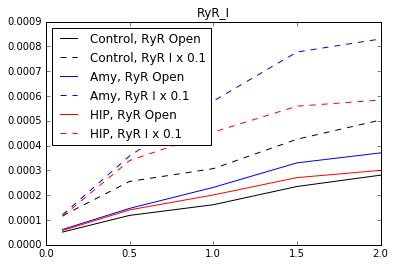

In [14]:
cases = ['Control', 'Amy', 'HIP']
colors = ['k','b','r']

data = "RyR"
for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
    
    data = "RyR_O"; col=6
    z = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    plt.plot(hz,z,colors[i],label=case+", RyR Open")
    data = "RyR_I"; col=5
    z = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    plt.plot(hz,0.1*z,colors[i]+"--",label=case+", RyR I x 0.1")

plt.legend(loc=0)
plt.title(data)



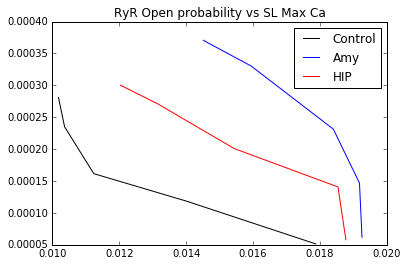

In [15]:
cases = ['Control', 'Amy', 'HIP']
colors = ['k','b','r']


for i,case in enumerate(cases):
    #bools = df['Case'].isin(['Control'])
    bools = df['Case'].isin([case])
    hz =df[bools].as_matrix(columns=df.columns[1:2])
        
    data = "RyR_O"; col=6    
    ryro = df[bools].as_matrix(columns=df.columns[col:(col+1)])
    data = "SL_Ca"; col = 2
    sl_ca_max = df[bools].as_matrix(columns=df.columns[col:(col+1)])    
    plt.plot(sl_ca_max,ryro,colors[i],label=case)
plt.legend(loc=0)
plt.title("RyR Open probability vs SL Max Ca")
